<a href="https://colab.research.google.com/github/PIYALI-bhunia/DEEP_LEARNING/blob/main/hyperparameterregressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  after removing the cwd from sys.path.


In [2]:
!pip install keras-tuner

     |████████████████████████████████| 98 kB 3.5 MB/s 


In [4]:
dataset=pd.read_csv("/content/drive/MyDrive/ML DATASET/concrete_data.csv")
dataset.shape

(1030, 9)

In [5]:
dataset.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [6]:
X=dataset.iloc[:,:-1] ## independent features
y=dataset.iloc[:,-1] ## dependent features

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [8]:
def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='linear'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='mean_absolute_error',
        metrics=['mean_absolute_error'])
    return model

In [10]:
tuner = RandomSearch(
    build_model,
    objective='val_mean_absolute_error',
    max_trials=5,
    executions_per_trial=3,
    directory='project',
    project_name='concrete')

In [11]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [13]:
tuner.search(X_train, y_train,
             epochs=100,
             validation_data=(X_test, y_test))

Trial 5 Complete [00h 01m 03s]
val_mean_absolute_error: 4.850387732187907

Best val_mean_absolute_error So Far: 4.433990478515625
Total elapsed time: 00h 06m 46s
INFO:tensorflow:Oracle triggered exit


In [14]:
tuner.results_summary()

Results summary
Results in project/concrete
Showing 10 best trials
Objective(name='val_mean_absolute_error', direction='min')
Trial summary
Hyperparameters:
num_layers: 13
units_0: 64
units_1: 384
learning_rate: 0.001
units_2: 288
units_3: 96
units_4: 416
units_5: 320
units_6: 288
units_7: 96
units_8: 352
units_9: 416
units_10: 384
units_11: 256
units_12: 32
Score: 4.433990478515625
Trial summary
Hyperparameters:
num_layers: 12
units_0: 224
units_1: 320
learning_rate: 0.001
units_2: 480
units_3: 480
units_4: 288
units_5: 96
units_6: 32
units_7: 64
units_8: 352
units_9: 32
units_10: 32
units_11: 32
Score: 4.47404940923055
Trial summary
Hyperparameters:
num_layers: 9
units_0: 256
units_1: 320
learning_rate: 0.01
units_2: 96
units_3: 32
units_4: 32
units_5: 32
units_6: 32
units_7: 32
units_8: 32
Score: 4.805967966715495
Trial summary
Hyperparameters:
num_layers: 9
units_0: 288
units_1: 288
learning_rate: 0.01
units_2: 224
units_3: 64
units_4: 64
units_5: 128
units_6: 480
units_7: 96
units

In [15]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import *
import keras_tuner as kt
import tensorflow as tf

In [36]:
# Initialising the ANN
regressor = Sequential()

# Adding the input layer and the first hidden layer
regressor.add(Dense(units= 64,activation='relu',input_shape= (8,)))

# Adding the second hidden layer
regressor.add(Dense(units= 384,activation='relu'))
regressor.add(Dense(units= 288,activation='relu'))
regressor.add(Dense(units= 96, activation='relu'))
regressor.add(Dense(units= 416,activation='relu'))
regressor.add(Dense(units= 320,activation='relu'))
regressor.add(Dense(units= 288, activation='relu'))
regressor.add(Dense(units= 96, activation='relu'))
regressor.add(Dense(units= 352, activation='relu'))
regressor.add(Dense(units= 416,activation='relu'))
regressor.add(Dense(units= 384, activation='relu'))
regressor.add(Dense(units= 256,activation='relu'))
regressor.add(Dense(units= 32,activation='relu'))

# Adding the output layer
regressor.add(Dense(units= 1, activation = 'linear'))



In [37]:
regressor.compile(optimizer='adam',loss='mean_squared_error', metrics=['mae'])
regressor.summary()
  

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_99 (Dense)            (None, 64)                576       
                                                                 
 dense_100 (Dense)           (None, 384)               24960     
                                                                 
 dense_101 (Dense)           (None, 288)               110880    
                                                                 
 dense_102 (Dense)           (None, 96)                27744     
                                                                 
 dense_103 (Dense)           (None, 416)               40352     
                                                                 
 dense_104 (Dense)           (None, 320)               133440    
                                                                 
 dense_105 (Dense)           (None, 288)              

In [38]:
history=regressor.fit(X_train_scaled, y_train ,validation_split=0.2, epochs = 100)

Epoch 1/100
21/21 [==============================] - 1s 23ms/step - loss: 675.7362 - mae: 20.4205 - val_loss: 244.5511 - val_mae: 12.4642
Epoch 2/100
21/21 [==============================] - 0s 15ms/step - loss: 202.7151 - mae: 11.2743 - val_loss: 170.2834 - val_mae: 10.6539
Epoch 3/100
21/21 [==============================] - 0s 16ms/step - loss: 165.0513 - mae: 10.2992 - val_loss: 212.1195 - val_mae: 11.3160
Epoch 4/100
21/21 [==============================] - 0s 15ms/step - loss: 125.6479 - mae: 8.8829 - val_loss: 111.3117 - val_mae: 8.2551
Epoch 5/100
21/21 [==============================] - 0s 15ms/step - loss: 79.0978 - mae: 6.9661 - val_loss: 102.5590 - val_mae: 8.1826
Epoch 6/100
21/21 [==============================] - 0s 15ms/step - loss: 65.8521 - mae: 6.3557 - val_loss: 75.4778 - val_mae: 6.6614
Epoch 7/100
21/21 [==============================] - 0s 14ms/step - loss: 45.8524 - mae: 5.3694 - val_loss: 66.9942 - val_mae: 6.2766
Epoch 8/100
21/21 [============================

In [39]:
from matplotlib import pyplot as plt

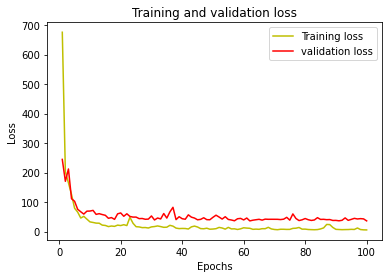

In [40]:
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(loss) +1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


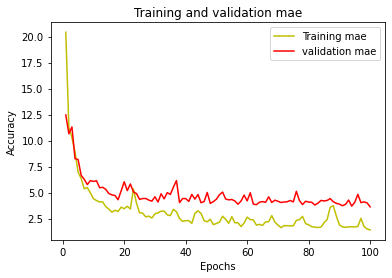

In [41]:
acc=history.history['mae']
val_acc=history.history['val_mae']
plt.plot(epochs, acc, 'y', label='Training mae')
plt.plot(epochs, val_acc, 'r', label='validation mae')
plt.title('Training and validation mae')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [42]:
predictions=regressor.predict(X_test_scaled[:5])
print("predicted value are:",predictions)
print("real value are:",y_test[:5])

predicted value are: [[17.716528]
 [ 5.694119]
 [76.882416]
 [58.94607 ]
 [11.121167]]
real value are: 747    26.06
718    10.35
175    79.30
828    74.99
713     9.69
Name: Strength, dtype: float64


In [44]:
mse_neural, mae_neural=regressor.evaluate(X_test_scaled,y_test)
print('Mean squared error from neural network:',mse_neural)
print('Mean absolute error from neural network :', mae_neural)


7/7 [==============================] - 0s 4ms/step - loss: 31.0676 - mae: 3.5171
Mean squared error from neural network: 31.067628860473633
Mean absolute error from neural network : 3.517061710357666


In [45]:
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [47]:
lr_model=linear_model.LinearRegression()
lr_model.fit(X_train_scaled,y_train)
y_pred_lr=lr_model.predict(X_test_scaled)
mse_lr=mean_squared_error(y_test,y_pred_lr)
mae_lr=mean_absolute_error(y_test, y_pred_lr)
print('Mean squared error from linear regression:', mse_lr)
print('Mean absolute error from linear regression:', mae_lr)


Mean squared error from linear regression: 95.61717380589968
Mean absolute error from linear regression: 7.864641991336005
